In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


# 5 . 8219 rows and 4 columns

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
   

In [8]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247



7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
   

In [10]:
gdp_df.value_counts(['Year']).sort_index()

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
Name: count, dtype: int64

In [11]:
count_country=gdp_df.value_counts(['Country'])
count_country

Country                    
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [12]:
all_data_countries = count_country[count_country ==34]

In [13]:
all_data_countries.value_counts()

count
34    228
Name: count, dtype: int64

# 7. 228 countries have all the data

In [14]:
missing_data_countries = count_country[count_country <34]

In [15]:
missing_data_countries

Country                  
Lebanon                      33
Tonga                        33
Bhutan                       33
Syrian Arab Republic         33
Somalia                      33
Greenland                    32
West Bank and Gaza           30
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: int64

# 7. Countries which have all years data are 228. Countries which are missingmany years data are 19. GDP per capita has been increasing by year


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [16]:
gdp_2020=gdp_df.loc[(gdp_df.Year==2020)]

In [17]:
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

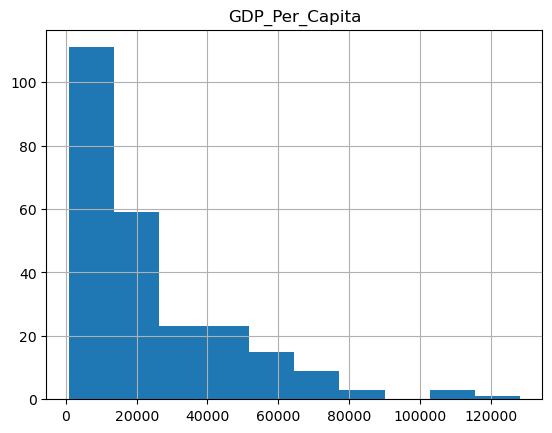

In [76]:
gdp_2020.hist('GDP_Per_Capita')


<Axes: ylabel='GDP_Per_Capita'>

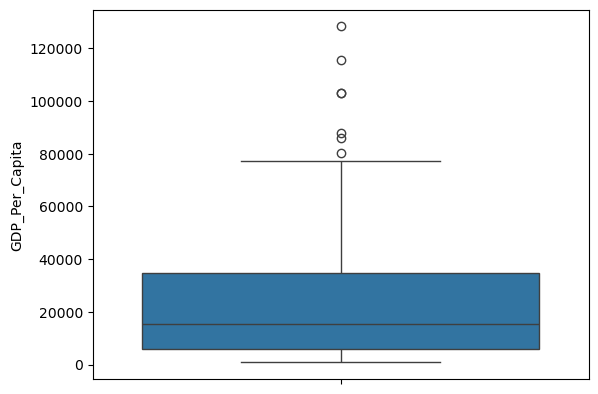

In [77]:
sns.boxplot(data = gdp_2020, y='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

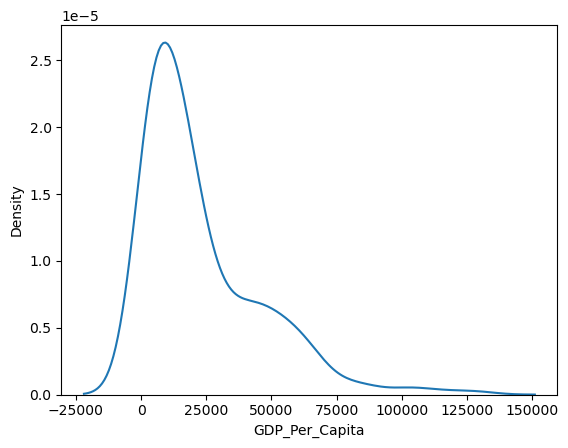

In [20]:
sns.kdeplot(gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

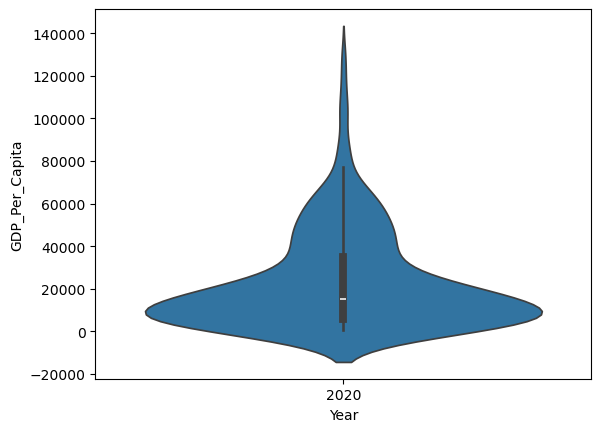

In [78]:
sns.violinplot(data = gdp_2020,x='Year', y='GDP_Per_Capita')

9. What was the median GDP per capita value in 2020?

In [22]:
gdp_2020['GDP_Per_Capita'].median()


15309.23598817024

# 9) 15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [23]:
gdp_decades = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) |  (gdp_df['Year'] == 2020)]

In [79]:
decades =[1990,2000,2010,2020]

In [80]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]

In [24]:
gdp_decades


,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

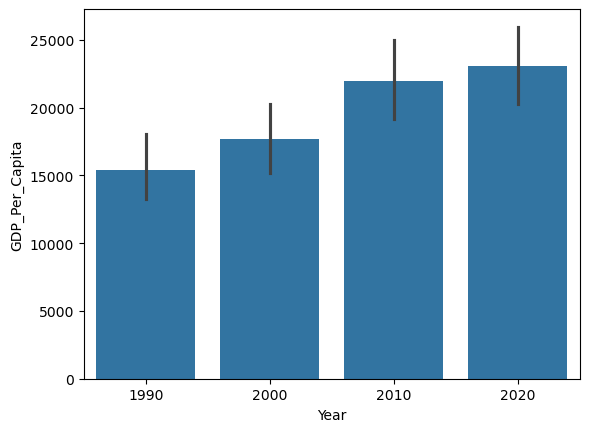

In [25]:
sns.barplot(x = 'Year',y = 'GDP_Per_Capita',data = gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

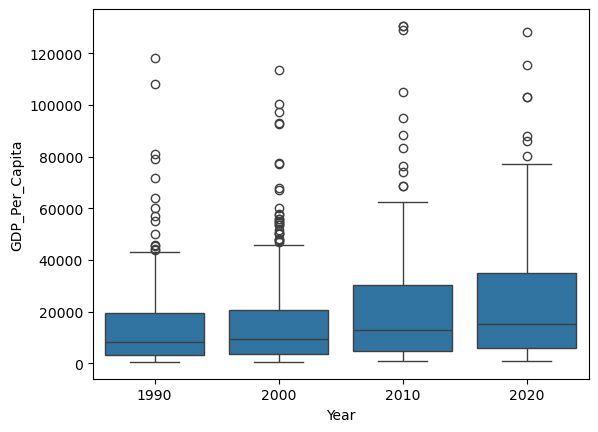

In [26]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

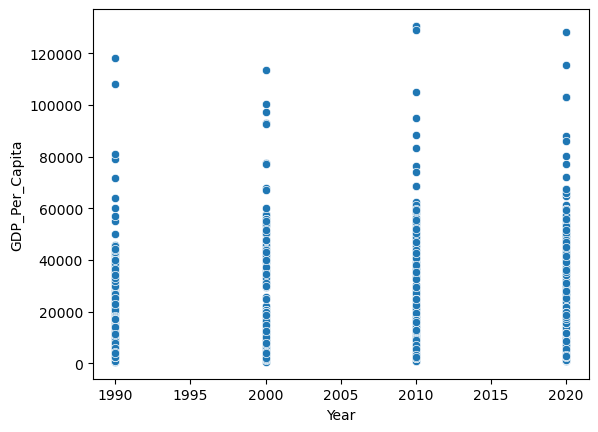

In [27]:
sns.scatterplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

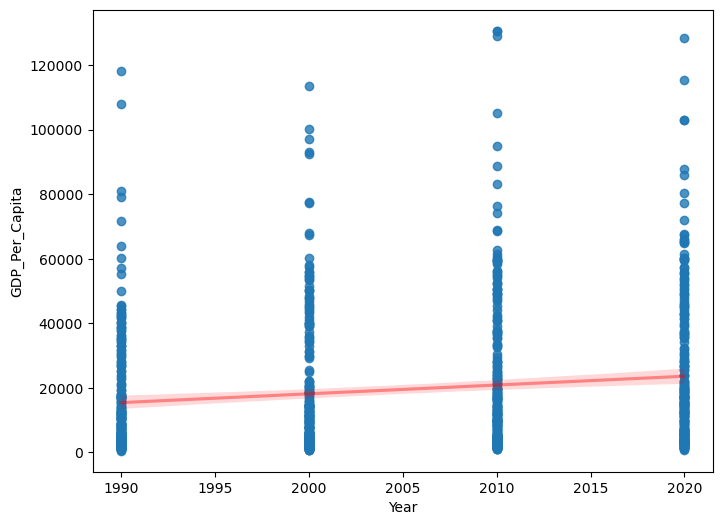

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'],line_kws={'color':'red','alpha':0.4},ax=ax)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

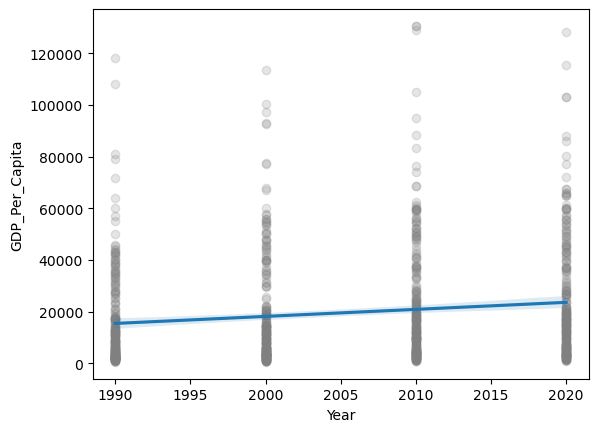

In [82]:
sns.regplot(data=gdp_decades,x='Year',y='GDP_Per_Capita',scatter_kws = {'color':'grey','alpha':0.2})

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

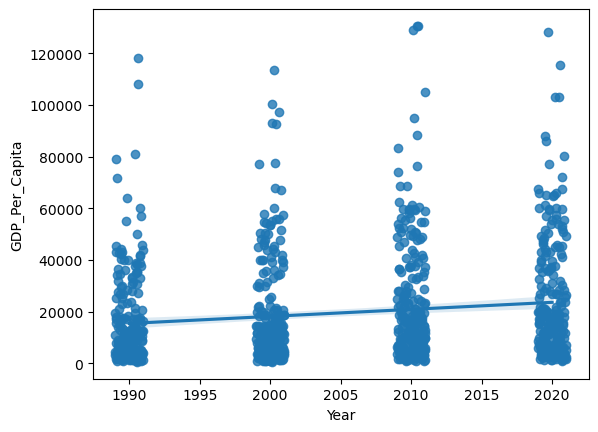

In [83]:
sns.regplot(data=gdp_decades,x='Year',y='GDP_Per_Capita',x_jitter =True)

11. Which country was the first to have a GDP per capita greater than $100,000?
    

In [84]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year').head(2).Country #chris

974                   Brunei
7827    United Arab Emirates
Name: Country, dtype: object

In [29]:
first_high_gdp_country = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [30]:
first_high_gdp_country.sort_values('Year')

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


# Brunei is first to have a GDP per capita greater than 100000

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

#chris

In [88]:
top_country = gdp_2020.sort_values('GDP_Per_Capita',ascending = False).Country.head(1)   

In [90]:
top_over_time = gdp_df.loc[gdp_df.Country.isin(top_country)]

(0.0, 150000.0)

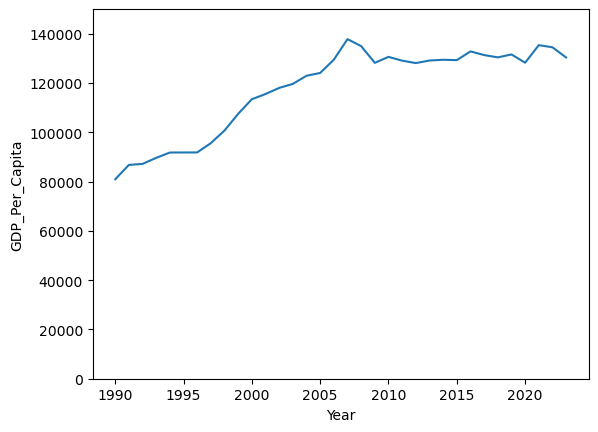

In [93]:
sns.lineplot(data=top_over_time, x='Year',y='GDP_Per_Capita')
plt.ylim(bottom = 0,top = 150000)

In [91]:
#mine

In [94]:
max_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita']==gdp_2020['GDP_Per_Capita'].max()]

In [95]:
max_gdp_2020

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [111]:
max_country = gdp_df.loc[gdp_df.Country.isin(max_gdp_2020)]

In [163]:
max_country

,Country,Year,GDP_Per_Capita


In [107]:
max_gdp_country = max_gdp_2020['Country']

TypeError: plot() got an unexpected keyword argument 'x'

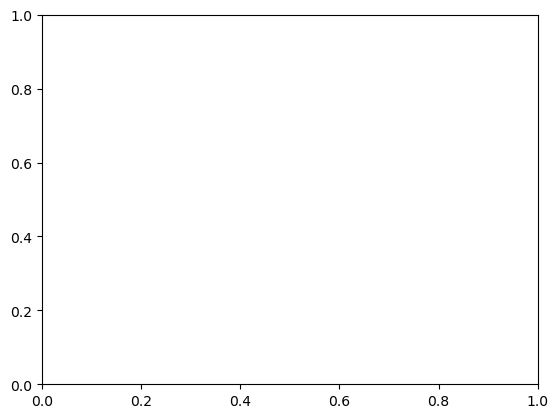

In [162]:
plt.plot(data = max_country,x = max_country.Year,y = max_country.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title(max_gdp_country)

# 12) Country                Zimbabwe
Year                       2020
GDP_Per_Capita    128256.560341

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 


In [112]:
lowest_country_GDP =gdp_2020.loc[gdp_2020['GDP_Per_Capita']==gdp_2020['GDP_Per_Capita'].min()]

In [113]:
lowest_country_GDP

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


In [114]:
lowest_country_name = lowest_country_GDP['Country']

In [116]:
min_gdp_country = gdp_df.loc[gdp_df['Country'].isin(lowest_country_GDP)]

In [117]:
min_gdp_country

,Country,Year,GDP_Per_Capita


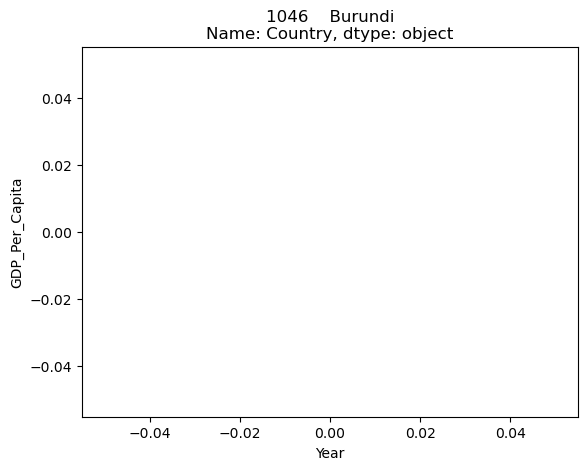

In [118]:
x=min_gdp_country['Year']
y=min_gdp_country['GDP_Per_Capita']
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title(lowest_country_name)
plt.plot(x,y)

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [44]:
two_years = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2020)]
two_years

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
91,Africa Western and Central,1990,3299.401375
...,...,...,...
8150,World,1990,11207.386344
8154,Zambia,2020,3391.595412
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823


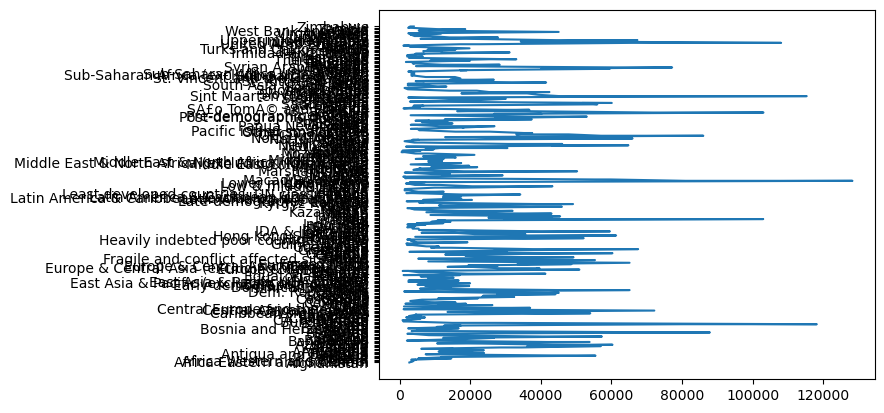

In [45]:
x=two_years['GDP_Per_Capita']
y=two_years['Country']
plt.plot(x,y)

In [164]:
internet_df = pd.read_csv('../data/internet_use.csv', engine = 'python', on_bad_lines = 'skip', skipfooter = 298)

#internet_df = pd.read_csv('internet.csv',nrows = 6083)--chris

In [165]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [166]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [49]:
internet_df = internet_df.rename(columns ={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [50]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [51]:
internet_df.loc[internet_df['Year']].value_counts().sort_index()

Country  Year  Internet_Users_Pct
Finland  1990  0.401088              212
         1991  1.397440              210
         1992  1.886880              207
         1993  2.568460              195
         1994  4.915100              188
         1995  13.900300             177
         1996  16.780100             141
         1997  19.458700              92
         1998  25.452500              66
         1999  32.295100              50
         2000  37.248500              39
         2001  43.105400             226
France   2001  26.325900              11
         2002  30.180000             184
         2003  36.140000             186
         2004  39.150000             186
         2005  42.870000             185
         2006  46.870000             174
         2007  66.090000             205
         2008  70.680000             206
         2009  71.580000             203
         2010  77.280000             204
         2011  77.820000             203
         2012  81.44000

17. What is the first year to have a non-zero internet users percentage value?

In [123]:
internet_df.loc[internet_df['Internet_Users_Pct']>0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2034,France,1990,0.052778
3054,Korea (Republic of),1990,0.023265
2192,Germany,1990,0.125892
5150,Spain,1990,0.012874
4197,Norway,1990,0.707299
...,...,...,...
340,Azerbaijan,2023,88.000000
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
5586,Türkiye,2023,85.960700


In [53]:
internet_df.Internet_Users_Pct.dtype

dtype('float64')

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [54]:
year_20_14=internet_df[(internet_df['Year']==2000)|(internet_df['Year']==2014)]

In [55]:
year_20_14

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


In [56]:
year_20_14.sort_values(by='Year').reset_index(drop=True)

,Country,Year,Internet_Users_Pct
0,Trinidad and Tobago,2000,7.721410
1,Zimbabwe,2000,0.401434
2,Tunisia,2000,2.750740
3,Zambia,2000,0.191072
4,Türkiye,2000,3.761690
...,...,...,...
409,Turkmenistan,2014,12.200000
410,Zimbabwe,2014,16.364700
411,Türkiye,2014,51.037400
412,Afghanistan,2014,7.000000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

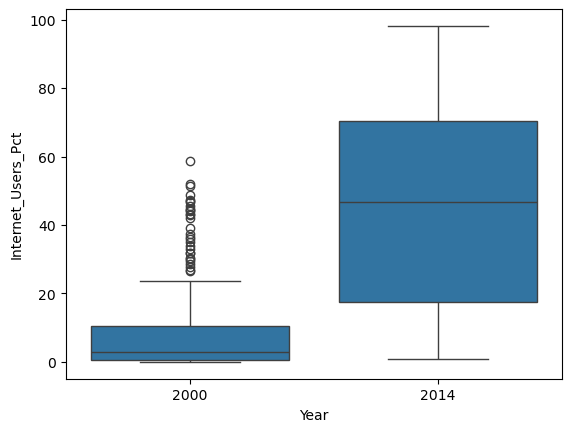

In [124]:
sns.boxplot(x='Year',y='Internet_Users_Pct',data=year_20_14)

19. For how many countries was the percentage of internet users below 5% in 2014?

In [58]:
year_2014 = internet_df.loc[internet_df['Year']==2014]

In [59]:
internet_pct_2014 = year_2014[year_2014['Internet_Users_Pct']<5]

In [125]:
len(internet_pct_2014.Country.value_counts())

10

# 19) 10 countries are below 5% of internet users in 2014

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [134]:
frames = [gdp_df,internet_df]

In [135]:
#chris gdp_internet_use =pd.merge(gdp_df,internet_df,on =['Country','Year'])


In [145]:
gdp_and_internet_use=pd.merge(gdp_df,internet_df,on=['Country','Year'])

In [146]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2927.245144,17.600000
1,Afghanistan,2018,2902.392113,16.800000
2,Afghanistan,2017,2952.998916,13.500000
3,Afghanistan,2016,2958.785399,11.000000
4,Afghanistan,2015,2967.692067,8.260000
...,...,...,...,...
4798,Zimbabwe,1997,4304.406272,0.033080
4799,Zimbabwe,1996,4271.479930,0.016790
4800,Zimbabwe,1995,3935.280057,0.007684
4801,Zimbabwe,1994,3965.730986,0.001739


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [147]:
# chris top_3 = internet_2014.sort_values('Internet_Users_Pct',ascending = False).Country.head(3)
# top_3_gdp_internet = gdp_ad_internet_use.loc[gdp_and_internet_use.Country.isin(top_3)]

In [148]:
high_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]

In [149]:
top_3_gdp = high_internet_use_2014.sort_values(by='Internet_Users_Pct',ascending =False).head(3)

In [150]:
iceland_2014 = high_internet_use_2014.loc[high_internet_use_2014['Country']=='Iceland']

In [151]:
Bermuda_2014 = high_internet_use_2014.loc[high_internet_use_2014['Country']=='Bermuda']

In [152]:
Norway_2014 = high_internet_use_2014.loc[high_internet_use_2014['Country']=='Norway']

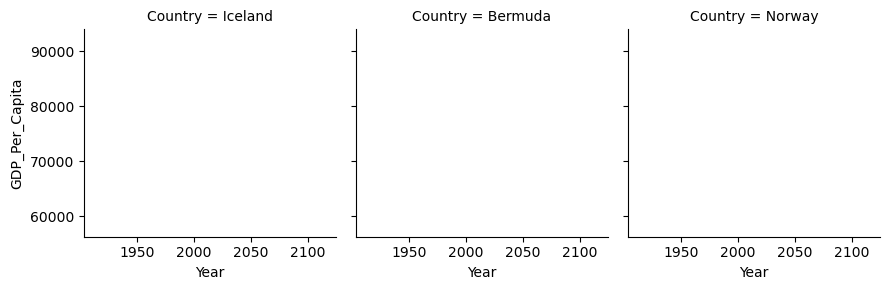

In [153]:
g=sns.FacetGrid(top_3_gdp,col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [154]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]

In [155]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,3017.942544,7.0000
27,Albania,2014,12788.747231,54.3000
56,Algeria,2014,15073.762940,29.5000
85,Andorra,2014,59929.244467,86.1000
112,Angola,2014,10250.592404,21.3623
...,...,...,...,...
4666,Uzbekistan,2014,7145.109807,35.5000
4695,Vanuatu,2014,3320.379187,18.8000
4723,Viet Nam,2014,8751.882806,41.0000
4751,Zambia,2014,3585.577485,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

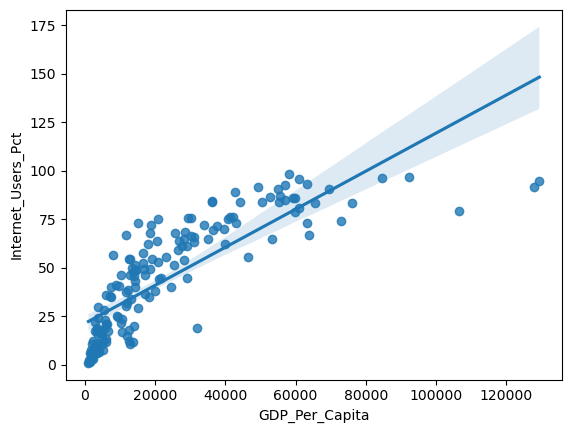

In [157]:
#chris
sns.regplot(data = gdp_and_internet_use_2014,x='GDP_Per_Capita',y='Internet_Users_Pct')

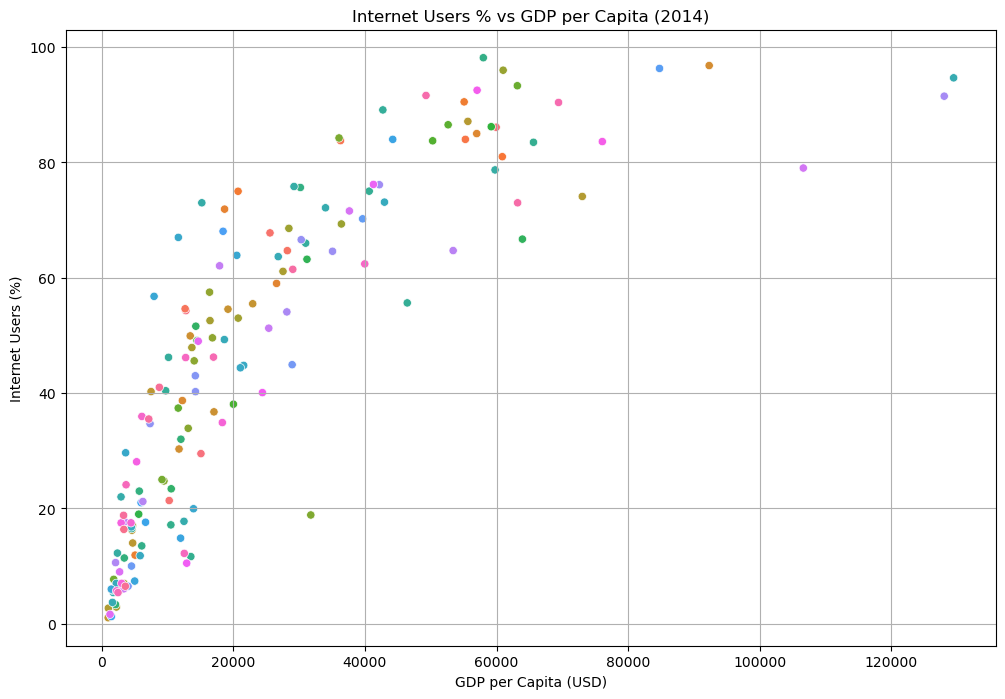

In [156]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=gdp_and_internet_use_2014,
                x='GDP_Per_Capita',
                y='Internet_Users_Pct',
                hue='Country',  # Optional: label outliers
                legend=False)

plt.title('Internet Users % vs GDP per Capita (2014)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Internet Users (%)')
plt.grid(True)
plt.show()


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [167]:
gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'],
    q=3,
    labels=["low", "medium", "high"]
)


C:\Users\nnavy\AppData\Local\Temp\ipykernel_4580\391786278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014.loc[:, 'GDP_group'] = pd.qcut(


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [168]:
median_internet_by_gdp_group = gdp_and_internet_use_2014.groupby('GDP_group', observed=True)['Internet_Users_Pct'].median()
median_internet_by_gdp_group

GDP_group
low       11.4000
medium    45.5904
high      76.1603
Name: Internet_Users_Pct, dtype: float64